### Histograms

In [1]:
# Let's begin by importing what we'll need (You'll probably be copying and pasting this a lot)

# The normal imports
import numpy as np
from numpy.random import randn
import pandas as pd

# Import the stats librayr from numpy
from scipy import stats

# These are the plotting modules adn libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Command so that plots appear in the iPython Notebook
%matplotlib inline

(array([  2.,   1.,  12.,  18.,  23.,  21.,   9.,  10.,   3.,   1.]),
 array([-2.84682085, -2.28146805, -1.71611525, -1.15076245, -0.58540964,
        -0.02005684,  0.54529596,  1.11064876,  1.67600157,  2.24135437,
         2.80670717]),
 <a list of 10 Patch objects>)

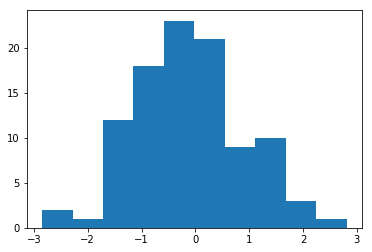

In [2]:
#Create a random normal-dist dataset
dataset1 = randn(100)

#Plot a histogram of the dataset, note bins=10 by default
plt.hist(dataset1)

(array([  2.,   0.,   4.,   7.,  26.,  15.,  12.,  10.,   1.,   3.]),
 array([-2.56787684, -2.02774075, -1.48760466, -0.94746856, -0.40733247,
         0.13280362,  0.67293971,  1.2130758 ,  1.75321189,  2.29334798,
         2.83348408]),
 <a list of 10 Patch objects>)

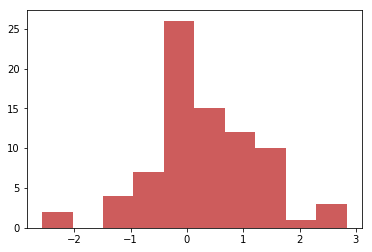

In [3]:
# Lets make another dataset
dataset2 = randn(80)

#Plot
plt.hist(dataset2,color='indianred')

(array([ 0.09256926,  0.        ,  0.        ,  0.        ,  0.09256926,
         0.09256926,  0.13885389,  0.18513853,  0.64798484,  0.55541558,
         0.46284632,  0.23142316,  0.41656168,  0.13885389,  0.32399242,
         0.13885389,  0.04628463,  0.        ,  0.09256926,  0.04628463]),
 array([-2.56787684, -2.29780879, -2.02774075, -1.7576727 , -1.48760466,
        -1.21753661, -0.94746856, -0.67740052, -0.40733247, -0.13726443,
         0.13280362,  0.40287166,  0.67293971,  0.94300776,  1.2130758 ,
         1.48314385,  1.75321189,  2.02327994,  2.29334798,  2.56341603,
         2.83348408]),
 <a list of 20 Patch objects>)

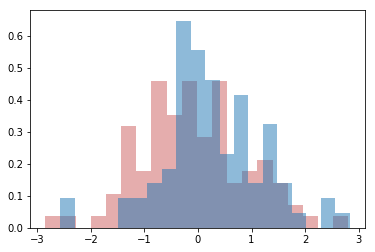

In [4]:
# We can use normed to plot on same plot

# Set normed=True for the plots to be normalized in order to comapre data sets with different number of observations
# Set alpha=0.5 for transperancy

plt.hist(dataset1,normed=True,color='indianred',alpha=0.5,bins=20)
plt.hist(dataset2,normed=True,alpha=0.5,bins=20)

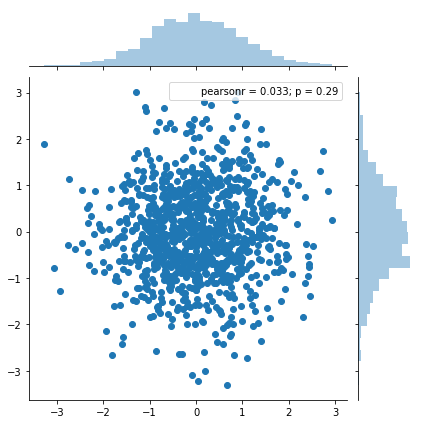

In [5]:
# Make two more random normal dist data sets
data1 = randn(1000)
data2 = randn(1000)

#Can represent joint distributions using joint plots
sns.jointplot(data1,data2)

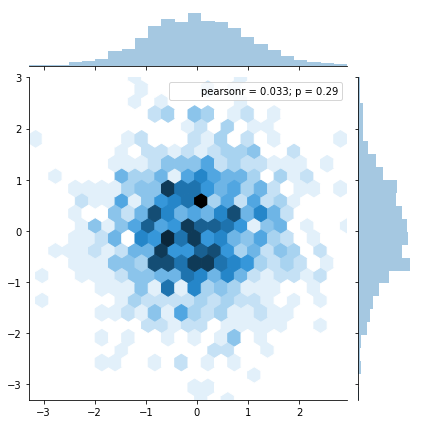

In [6]:
sns.jointplot(data1, data2, kind='hex')

### Kernel Density Estimation Plots

First we'll learn how to understand and make a KDE plot manually, and then we'll see how to do it quickly with seaborn!

(0, 1)

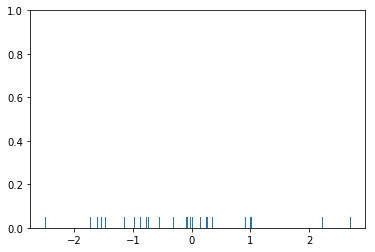

In [7]:
# Let's start off with a carpet/rug plot
# A rug plot simpot puts ticks wherever a value occured

#Create dataset
dataset = randn(25)
#Create rugplot
sns.rugplot(dataset)
#Set y-axis limit
plt.ylim(0,1)

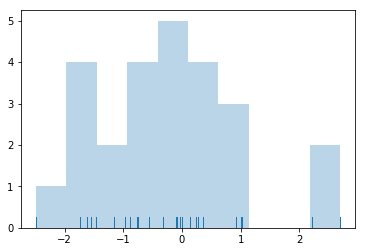

In [8]:
# Plot a histogram on top of 
plt.hist(dataset,alpha=0.3)
sns.rugplot(dataset)

The histogram sets up 10 bins and then just count how many ticks appeared in each bin, setting the height of each bar

The kernel density plot will represent each tick mark with a gaussian basis function. Let's see how we would do this manually

(0, 1)

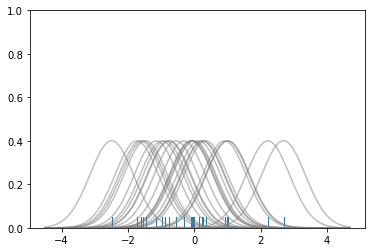

In [9]:
# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

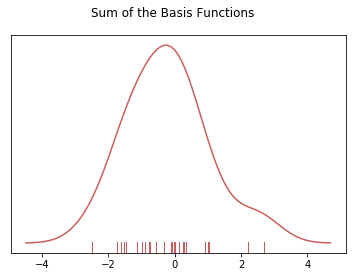

In [10]:
# To get the kde plot we can sum these basis functions.



# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

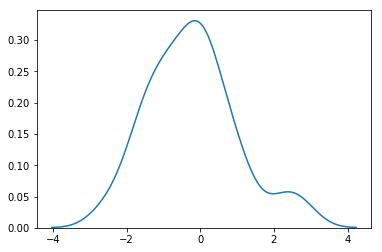

In [11]:
# Now we can see how to do it in one step with seaborn! Awesome!
sns.kdeplot(dataset)

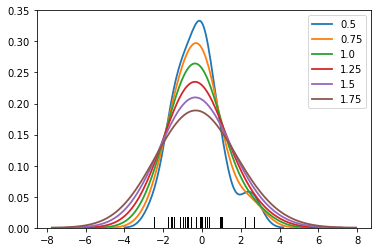

In [12]:
# We can adjust the bandwidth of the sns kde to make the kde plot more or less sensitive to high frequency

# Rugplot
sns.rugplot(dataset,color='black')

# Plot various bandwidths
for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw=bw,lw=1.8,label=bw)

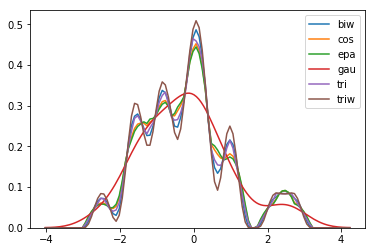

In [13]:
# We can also choose different kernels

kernel_options = ["biw", "cos", "epa", "gau", "tri", "triw"]

# More info on types
url = 'http://en.wikipedia.org/wiki/Kernel_(statistics)'

# Use label to set legend
for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern)

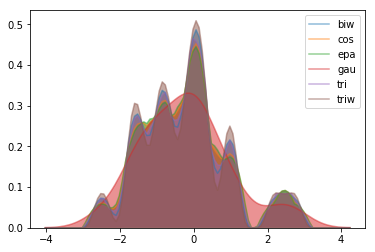

In [14]:
# We can also shade if desired
for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern,shade=True,alpha=0.5)

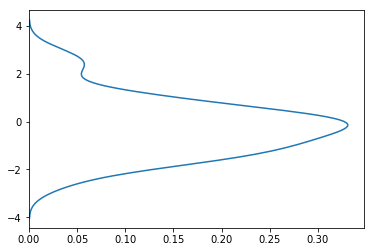

In [15]:
# For vertical axis, use the vertical keyword
sns.kdeplot(dataset,vertical=True)

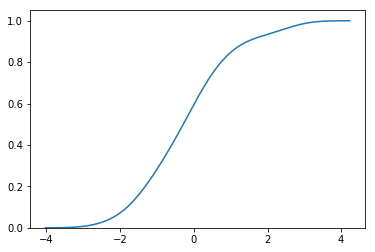

In [16]:
# Finally we can also use kde plot to create a cumulative distribution function (CDF) of the data

# URL for info on CDF
url = 'http://en.wikipedia.org/wiki/Cumulative_distribution_function'

sns.kdeplot(dataset,cumulative=True)

#### Multivariate Density Estimation using kdeplot
We can also use kdeplot for multidimensional data. Lets see how it works!

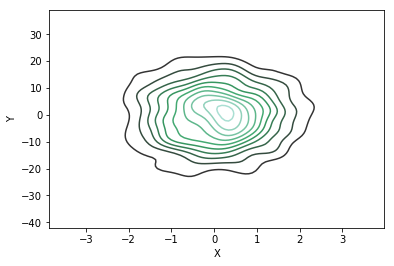

In [17]:
# Let's create a new dataset

# Mean center of data
mean = [0,0]

# Diagonal covariance
cov = [[1,0],[0,100]]

# Create dataset using numpy
dataset2 = np.random.multivariate_normal(mean,cov,1000)

# Bring back our old friend pandas
dframe = pd.DataFrame(dataset2,columns=['X','Y'])

# Plot our dataframe
sns.kdeplot(data=dframe['X'], data2=dframe['Y'])

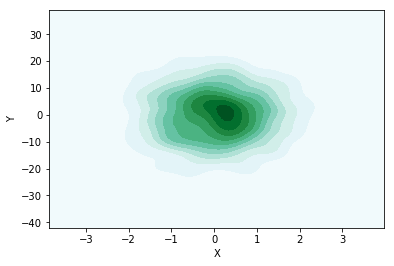

In [18]:
# We could have also passed two vectors seperately, and shade
sns.kdeplot(dframe.X,dframe.Y,shade=True)

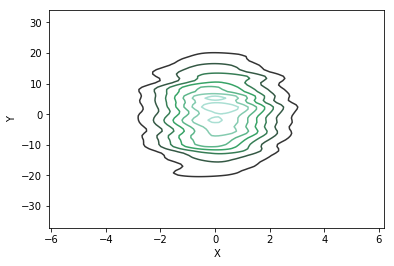

In [19]:
# Can specify a particualr bandwidth
sns.kdeplot(data=dframe['X'], data2=dframe['Y'],bw=1)

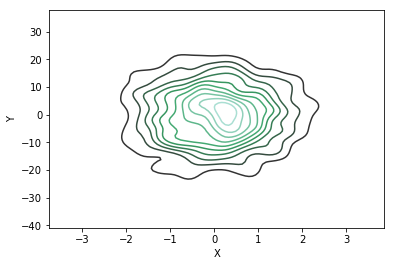

In [20]:
# Or just use silverman again
sns.kdeplot(data=dframe.X, data2=dframe.Y,bw='silverman')

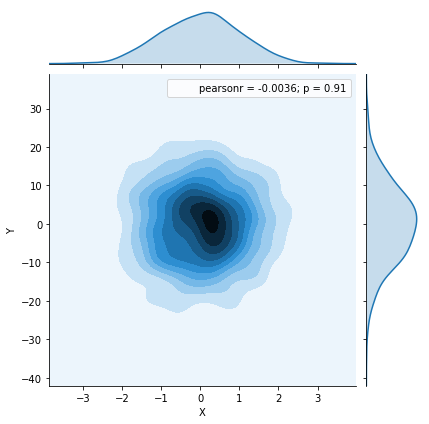

In [21]:
# We can also create a kde joint plot, simliar to the hexbin plots we saw before

sns.jointplot('X','Y',dframe,kind='kde')

### Combining Plot Styles

In [22]:
# Now we'l learn how to combine plot styles

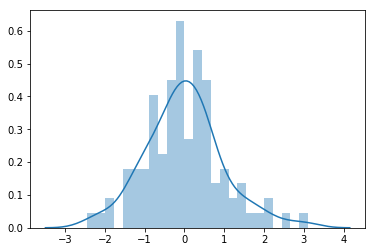

In [23]:
# Create datset
dataset = randn(100)

# Use distplot for combining plots, by default a kde over a histogram is shown
sns.distplot(dataset,bins=25)

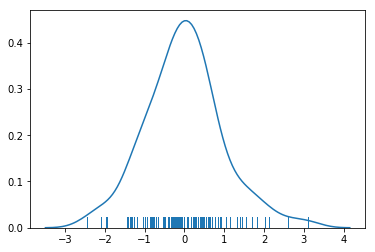

In [24]:
# hist, rug, and kde are all input arguments to turn those plots on or off
sns.distplot(dataset,rug=True,hist=False)

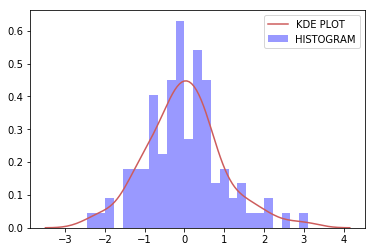

In [25]:
# TO control specific plots in distplot, use [plot]_kws argument with dictionaries.

#Here's an example

sns.distplot(dataset,bins=25,
             kde_kws={'color':'indianred','label':'KDE PLOT'},
             hist_kws={'color':'blue','label':"HISTOGRAM"})

In [26]:
# WE can also use pandas data objects for this

from pandas import Series

# Create Series form dataset
ser1 = Series(dataset,name='My_DATA')

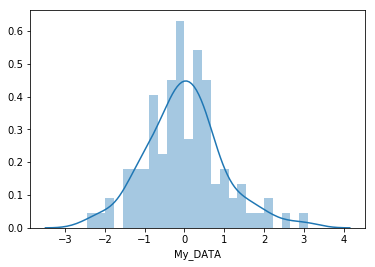

In [27]:
# Plot Series
sns.distplot(ser1,bins=25)

### Box and Violin Plots

In [28]:
# Now we'll learn about box and violin plots
url = 'http://en.wikipedia.org/wiki/Box_plot#mediaviewer/File:Boxplot_vs_PDF.svg'

# Let's create two distributions
data1 = randn(100)
data2 = randn(100) + 2 # Off set the mean
data = pd.DataFrame({0:data1, 1:data2})

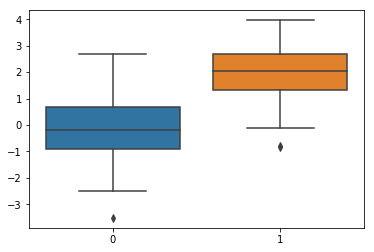

In [29]:
# Now we can create a box plot
sns.boxplot(data=data)

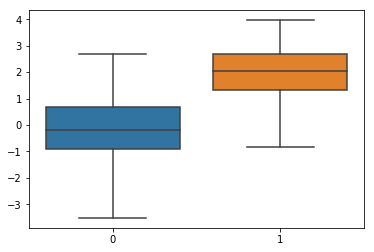

In [30]:
# Notice how the previous plot had outlier points, we can include those with the "whiskers"
sns.boxplot(data=data, whis=np.inf)

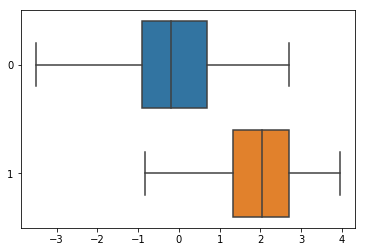

In [31]:
# WE can also set horizontal by setting vertical to false
sns.boxplot(data=data,whis=np.inf, orient='h')

In [32]:
# While box plots are great, they can sometimes not give the full picture

# Violin/Viola plots can combine the simplicity of a box plot with the information of a kde plot

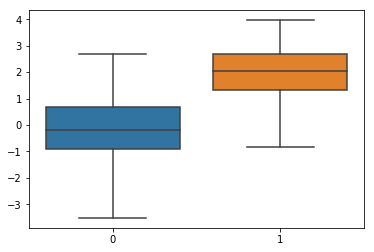

In [33]:
# Let's create an example where a box plot doesn't give the whole picture

# Normal Distribution
data1 = stats.norm(0,5).rvs(100)

# Two gamma distributions concatenated together (Second one is inverted)
data2 = np.concatenate([stats.gamma(5).rvs(50)-1,
                        -1*stats.gamma(5).rvs(50)])

# Box plot them
sns.boxplot(data=data,whis=np.inf)

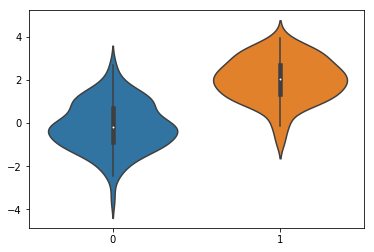

In [34]:
# From the above plots, you may think that the distributions are fairly similar
# But lets check out what a violin plot reveals
sns.violinplot(data=data)

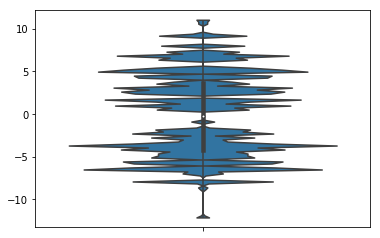

In [35]:
# Wow, quite revealing!
# We can also change the bandwidth of the kernel used for the density fit of the violin plots if desired
sns.violinplot(data2,bw=0.01, orient='v')

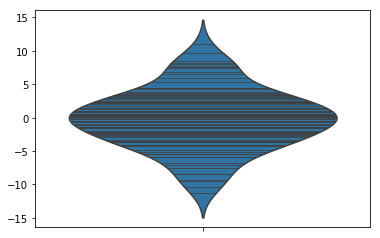

In [36]:
# Much like a rug plot, we can also include the individual points, or sticks
sns.violinplot(data1,inner="stick", orient='v')

### Regression Plots

In [37]:
# Now we'll learn how ot visualize multiple regression with lmplot()

# Luckily, Seaborn comes with an example dataset to use as a pandas DataFrame
tips = sns.load_dataset("tips")

In [38]:
# Preview
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


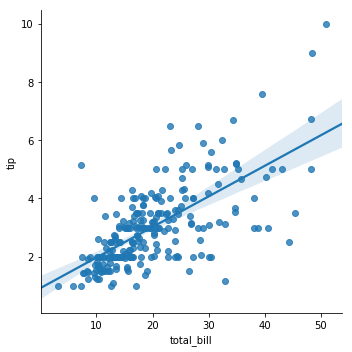

In [39]:
# Let's use lmplot() to plot the total bill versus tips
sns.lmplot("total_bill","tip",tips)

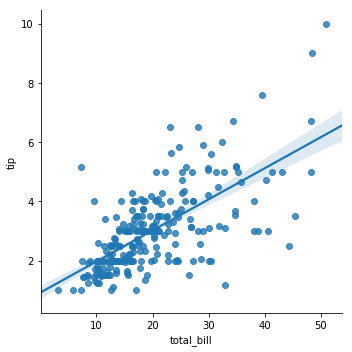

In [40]:
# First we can see a scatter plot of all the points, tip vs total_bill
# Then we see a linear regression line, which is an estimateed linear fit model to the data

# WE can also specify teh confidence interval to use for the linear fit

sns.lmplot("total_bill","tip",tips,ci=75) # 68% ci

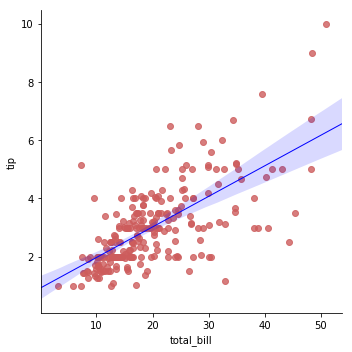

In [41]:
# Just like before, we can use dictionaries to edit individual parts of the plot

sns.lmplot("total_bill", "tip", tips,
           scatter_kws={"marker": "o", "color": "indianred"},
           line_kws={"linewidth": 1, "color": "blue"});

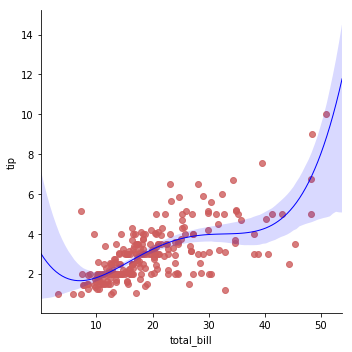

In [42]:
# WE can also check out higher-order trends
sns.lmplot("total_bill", "tip", tips,order=4,
           scatter_kws={"marker": "o", "color": "indianred"},
           line_kws={"linewidth": 1, "color": "blue"})

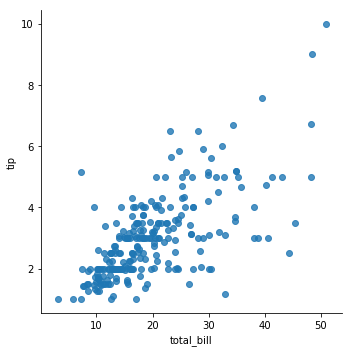

In [43]:
# We can also not fit a regression if desired
sns.lmplot("total_bill", "tip", tips,fit_reg=False)

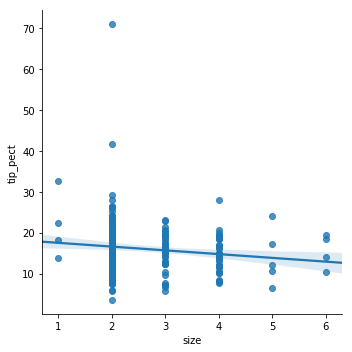

In [44]:
# lmplot() also works on discrete variables, such as the percentage of the tip

# Create a new column for tip percentage
tips["tip_pect"]=100*(tips['tip']/tips['total_bill'])

#plot
sns.lmplot("size", "tip_pect", tips);

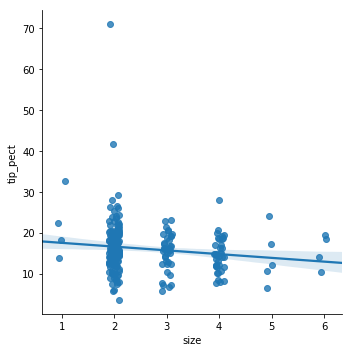

In [45]:
# We can also add jitter to this

#Info link
url = "http://en.wikipedia.org/wiki/Jitter"

#plot
sns.lmplot("size", "tip_pect", tips,x_jitter=.1);

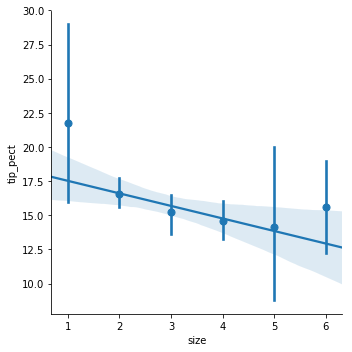

In [46]:
# We can also estimate the tendency of each bin (size of party in this case)
sns.lmplot("size", "tip_pect", tips, x_estimator=np.mean);

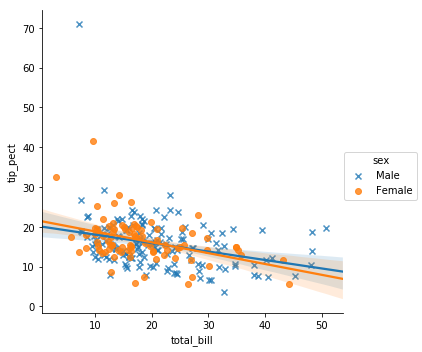

In [47]:
# Interesting, looks like there is more variance for party sizes of 1 then 2-4

# We can use the hue facet to automatically define subsets along a column

# Plot, note the markers argument
sns.lmplot("total_bill", "tip_pect", tips, hue="sex",markers=["x","o"])

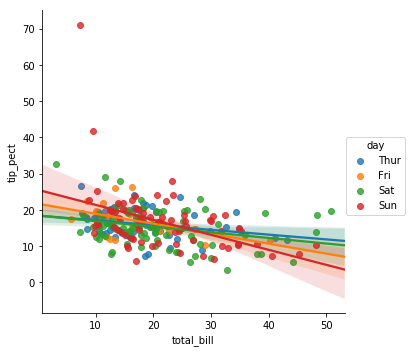

In [48]:
# Does day make a difference?
sns.lmplot("total_bill", "tip_pect", tips, hue="day")

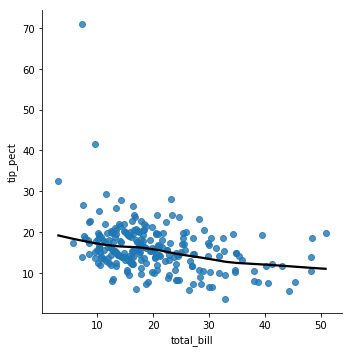

In [49]:
# Finally it should be noted that Seabron supports LOESS model fitting
url = 'http://en.wikipedia.org/wiki/Local_regression'

sns.lmplot("total_bill", "tip_pect", tips, lowess=True, line_kws={"color": 'black'});

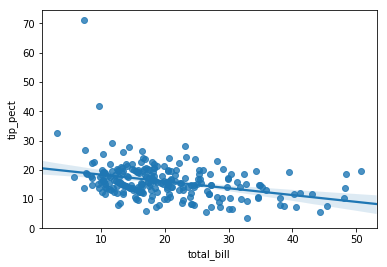

In [50]:
# The lmplot() we've been using is actually using a lower-level function, regplot()

sns.regplot("total_bill","tip_pect",tips)

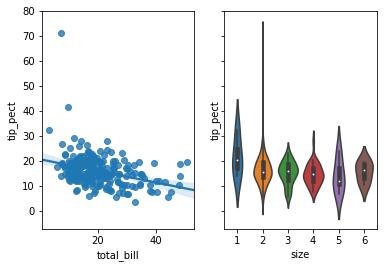

In [51]:
# reg_plot can be added to existing axes without modifying anything in the figure

# Create figure with 2 subplots
fig, (axis1,axis2) = plt.subplots(1,2,sharey =True)

sns.regplot("total_bill","tip_pect",tips,ax=axis1)
sns.violinplot(x='size', y='tip_pect',data=tips, ax=axis2)

### Heatmaps and Clustered Matrices

In [52]:
# Again seaborn comes with a great dataset to play and learn with
flight_dframe = sns.load_dataset('flights')

In [53]:
#Preview
flight_dframe.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [54]:
# Let's pivot this dataframe do its easier to manage
flight_dframe = flight_dframe.pivot("month","year","passengers")

#Show
flight_dframe

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


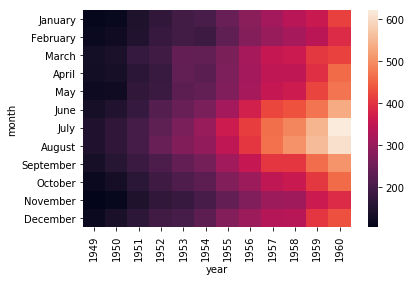

In [55]:
# This dataset is now in a clear format to be dispalyed as a heatmap
sns.heatmap(flight_dframe)

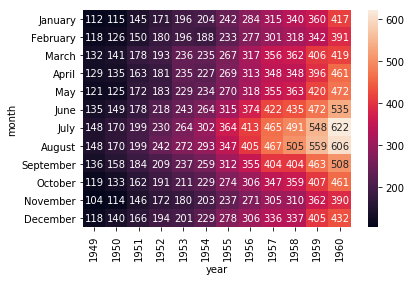

In [56]:
# We also have the option to annotate each cell
sns.heatmap(flight_dframe,annot=True,fmt='d')

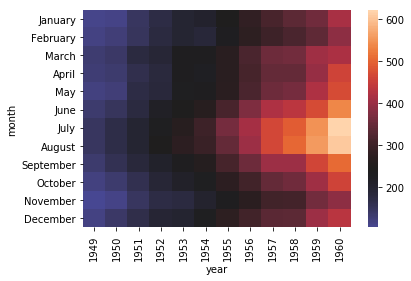

In [57]:
# seaborn will automatically try to pick the best color scheme for your dataset, 
# whether is be diverging or converging colormap

# We can choose our own 'center' for our colormap
sns.heatmap(flight_dframe,center=flight_dframe.loc['January',1955])

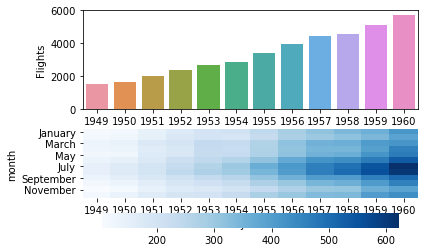

In [58]:
# heatmap() can be used on an axes for a subplot to create more informative figures
f, (axis1,axis2) = plt.subplots(2,1)

yearly_flights = flight_dframe.sum()

# Since yearly_flights is a weird format, we'll have to grab the values we want with a Series, 
# then put them in a dframe

years = pd.Series(yearly_flights.index.values)
years = pd.DataFrame(years)

flights = pd.Series(yearly_flights.values) 
flights = pd.DataFrame(flights)

# Make the dframe and name columns
year_dframe = pd.concat((years,flights),axis=1)
year_dframe.columns = ['Year','Flights']


# Create the bar plot on top
sns.barplot('Year',y='Flights',data=year_dframe, ax = axis1)

# Create the heatmap on bottom
sns.heatmap(flight_dframe,cmap='Blues',ax=axis2,cbar_kws={"orientation": "horizontal"})

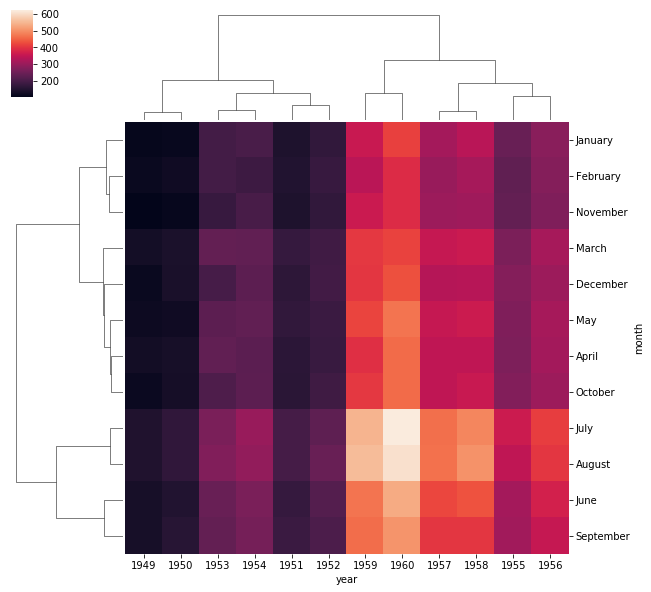

In [59]:
# Finally we'll learn about using a clustermap

# Clustermap will reformat the heatmap so similar rows are next to each other
sns.clustermap(data=flight_dframe)

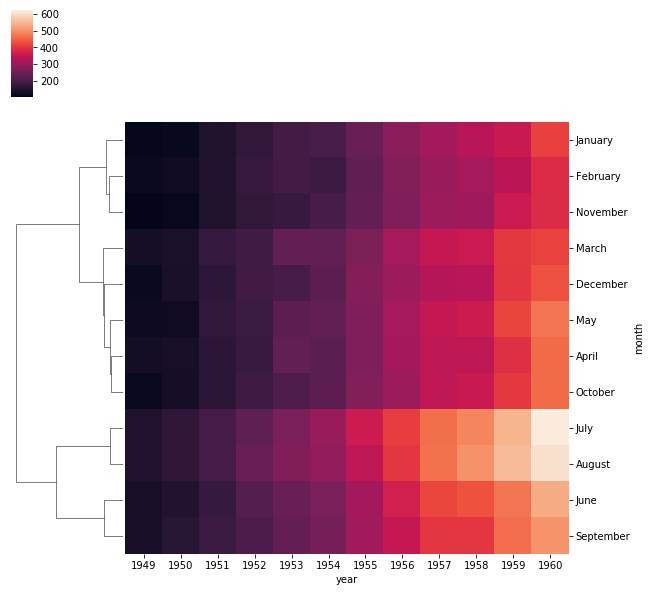

In [60]:
# Let's uncluster the columns
sns.clustermap(flight_dframe,col_cluster=False)

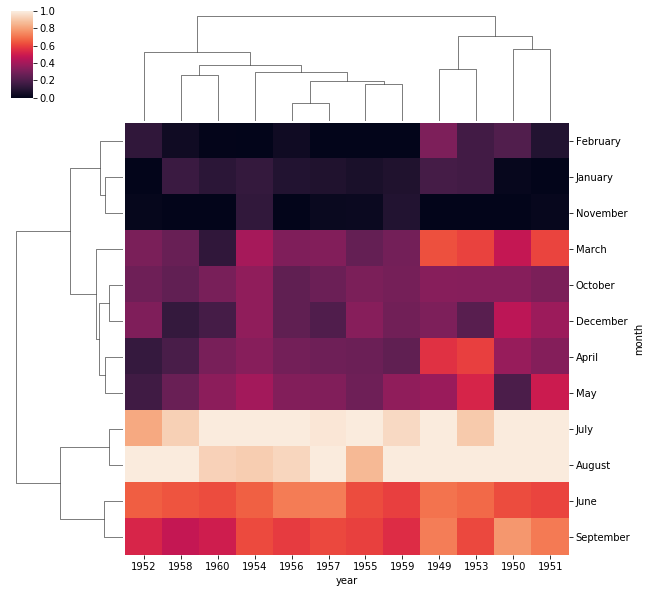

In [61]:
# Since the number of flights increase every year, we should set a standard scale
sns.clustermap(flight_dframe,standard_scale=1) # standardize by columns (year)

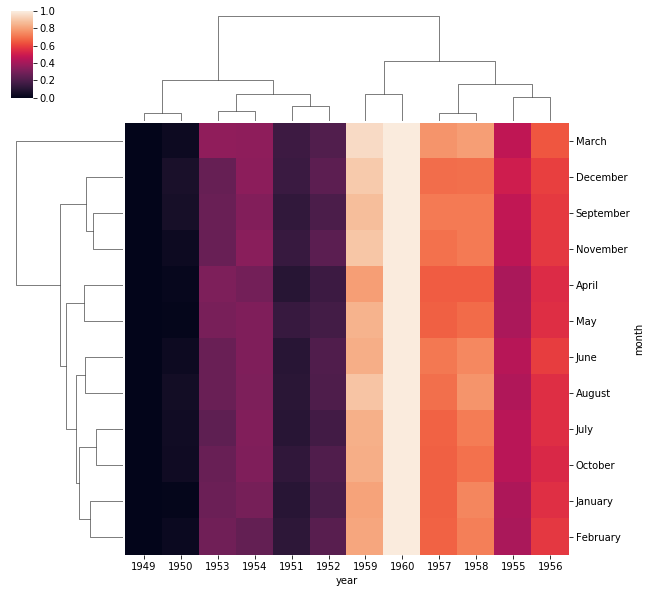

In [62]:
# Or scale the rows
sns.clustermap(flight_dframe,standard_scale=0)

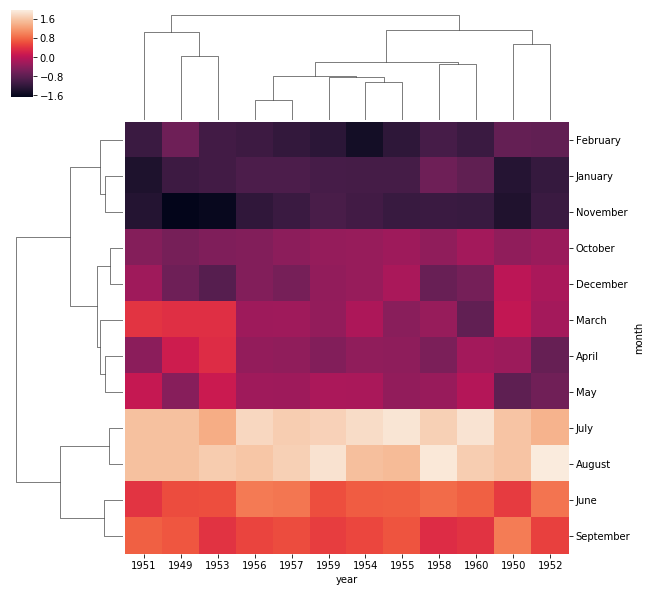

In [63]:
# Finally we can also normalize the rows by their Z-score.
# This subtracts the mean and devides by the STD of each column, then teh rows have amean of 0 and a variance of 1
sns.clustermap(flight_dframe,z_score=1)

In [64]:
# Above we can see which values are greater than the mean and which are below very clearly